# Winning a Kaggle Competition in Python

## Kaggle competitions process

### Explore train data

In [34]:
import pandas as pd

train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

train.head()

Train shape: (15500, 5)


,id,date,store,item,sales
0,100000,2017-12-01,1,1,19
1,100001,2017-12-02,1,1,16
2,100002,2017-12-03,1,1,31
3,100003,2017-12-04,1,1,7
4,100004,2017-12-05,1,1,20


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15500 non-null  int64 
 1   date    15500 non-null  object
 2   store   15500 non-null  int64 
 3   item    15500 non-null  int64 
 4   sales   15500 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 605.6+ KB


In [6]:
train.memory_usage(deep=True)

Index        128
id        124000
date     1038500
store     124000
item      124000
sales     124000
dtype: int64

### Explore test data

In [7]:
test = pd.read_csv('demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


In [8]:
sample_submission = pd.read_csv('sample_submission_demand.csv')

sample_submission.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


### Train a simple model

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Prepare a submission

In [10]:
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

### Explore overfitting XGBoost

In [11]:
train = pd.read_csv('train.csv')

In [12]:
train.shape

(913000, 4)

In [13]:
dates =['2017-11-01',
 '2017-11-02',
 '2017-11-03',
 '2017-11-04',
 '2017-11-05',
 '2017-11-06',
 '2017-11-07',
 '2017-11-08',
 '2017-11-09',
 '2017-11-10',
 '2017-11-11',
 '2017-11-12',
 '2017-11-13',
 '2017-11-14',
 '2017-11-15',
 '2017-11-16',
 '2017-11-17',
 '2017-11-18',
 '2017-11-19',
 '2017-11-20',
 '2017-11-21',
 '2017-11-22',
 '2017-11-23',
 '2017-11-24',
 '2017-11-25',
 '2017-11-26',
 '2017-11-27',
 '2017-11-28',
 '2017-11-29',
 '2017-11-30']

In [14]:
trim_train = train[train.date.apply(lambda x: x in dates)]

In [15]:
trim_train.shape

(15000, 4)

In [16]:
trim_train.head()

,date,store,item,sales
1765,2017-11-01,1,1,16
1766,2017-11-02,1,1,21
1767,2017-11-03,1,1,18
1768,2017-11-04,1,1,34
1769,2017-11-05,1,1,23


In [17]:
dates_test = ['2017-12-01',
 '2017-12-02',
 '2017-12-03',
 '2017-12-04',
 '2017-12-05',
 '2017-12-06',
 '2017-12-07',
 '2017-12-08',
 '2017-12-09',
 '2017-12-10',
 '2017-12-11',
 '2017-12-12',
 '2017-12-13',
 '2017-12-14',
 '2017-12-15',
 '2017-12-16',
 '2017-12-17',
 '2017-12-18',
 '2017-12-19',
 '2017-12-20',
 '2017-12-21',
 '2017-12-22',
 '2017-12-23',
 '2017-12-24',
 '2017-12-25',
 '2017-12-26',
 '2017-12-27',
 '2017-12-28',
 '2017-12-29',
 '2017-12-30',
 '2017-12-31']

In [18]:
trim_test = train[train.date.apply(lambda x: x in dates_test)]

In [19]:
trim_test.shape

(15500, 4)

In [20]:
trim_test.head()

,date,store,item,sales
1795,2017-12-01,1,1,19
1796,2017-12-02,1,1,16
1797,2017-12-03,1,1,31
1798,2017-12-04,1,1,7
1799,2017-12-05,1,1,20


### Train XGBoost models

In [21]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=trim_train[['store', 'item']],
                     label=trim_train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [22]:
# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [23]:
# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

In [24]:
from sklearn.metrics import mean_squared_error

dtest = xgb.DMatrix(data=trim_test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(trim_train['sales'], train_pred)                  
    mse_test = mean_squared_error(trim_test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}. Diff:  {:.3f} '.format(mse_train, mse_test, mse_train - mse_test))

MSE Train: 631.275. MSE Test: 558.522. Diff:  72.753 
MSE Train: 183.771. MSE Test: 337.337. Diff:  -153.566 
MSE Train: 134.984. MSE Test: 355.534. Diff:  -220.550 


## Dive into the Competition

### Define a competition metric

In [27]:
y_regression_pred = xg_depth_2.predict(dtrain)

In [30]:
y_regression_true = train_pred.copy()

In [31]:
import numpy as np

from sklearn.metrics import mean_squared_error

def own_mse(y_true, y_pred):
  	# Raise differences to the power of 2
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err

print('Sklearn MSE: {:.5f}. '.format(mean_squared_error(y_regression_true, y_regression_pred)))
print('Your MSE: {:.5f}. '.format(own_mse(y_regression_true, y_regression_pred)))

Sklearn MSE: 431.61481. 
Your MSE: 431.61481. 


In [ ]:
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
    # Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms) 
    return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

### EDA statistics

In [45]:
import matplotlib.pyplot as plt

In [48]:
train = pd.read_csv('train 2.csv', nrows=5000)

In [49]:
train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
4995,2010-09-04 12:45:32.0000001,6.5,2010-09-04 12:45:32 UTC,-73.980622,40.745157,-73.975777,40.755863,1
4996,2011-06-13 10:53:52.0000006,4.9,2011-06-13 10:53:52 UTC,-73.956664,40.766989,-73.961371,40.772639,1
4997,2013-12-12 21:26:40.0000004,7.5,2013-12-12 21:26:40 UTC,-73.988707,40.734343,-73.991737,40.722582,1
4998,2010-03-08 14:01:00.00000067,7.7,2010-03-08 14:01:00 UTC,-73.952795,40.776642,-73.965320,40.759412,5


In [50]:
def haversine_distance(train):
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

In [52]:
#train.to_csv('taxi_train_5000.csv', index=None)

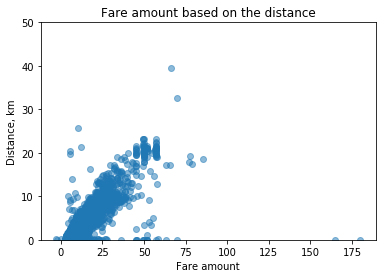

In [51]:
# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

In [53]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

In [54]:
hour_price.head()

,hour,fare_amount
0,0,10.0
1,1,10.0
2,2,8.5
3,3,8.5
4,4,10.7


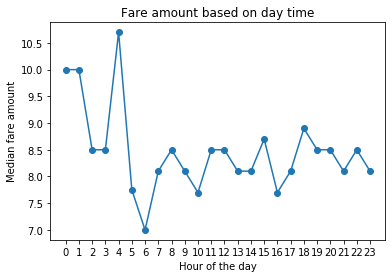

In [55]:
# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

### K-fold cross-validation

In [122]:
train = pd.read_json('rental_listing_inquiries_train.json')

In [123]:
train = train.loc[:,['bathrooms', 'bedrooms','building_id', 'latitude', 'longitude', 'manager_id', 'price', 'interest_level']]

In [124]:
train.head()

,bathrooms,bedrooms,building_id,latitude,longitude,manager_id,price,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,40.7108,-73.9539,a10db4590843d78c784171a107bdacb4,2400,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,40.7513,-73.9722,955db33477af4f40004820b4aed804a0,3800,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,40.7575,-73.9625,c8b10a317b766204f08e613cef4ce7a0,3495,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,3000,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,40.7439,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,2795,low


In [126]:
train.describe()

,bathrooms,bedrooms,latitude,longitude,price
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06


In [125]:
price_counts = np.unique(train.price, return_counts=True)

In [144]:
price_counts

(array([     43,      45,     401, ..., 1070000, 1150000, 4490000]),
 array([1, 1, 1, ..., 2, 1, 1]))

#### show only the prices between 0 - 100 along with their counts

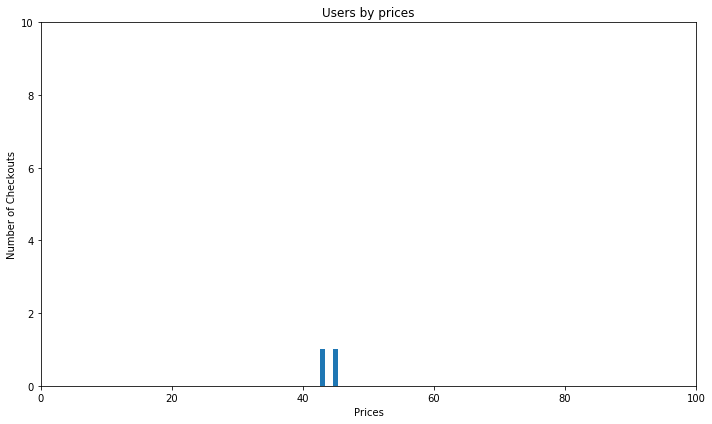

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(price_counts[0], price_counts[1])
ax.set_xlim([0, 100])
ax.set_ylim([0, 10])
ax.set_xlabel('Prices')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Users by prices')

plt.tight_layout()

In [69]:
train = train.sample(1000)

In [70]:
from sklearn.model_selection import KFold # random sampling

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in kf.split(train):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (666, 8)
Medium interest listings in CV train: 135

Fold: 1
CV train shape: (667, 8)
Medium interest listings in CV train: 150

Fold: 2
CV train shape: (667, 8)
Medium interest listings in CV train: 149



if we look at the number of medium-interest listings, it's varying from 135 to 150 from one fold to another. To make them uniform among the folds, let's use Stratified K-fold!

### Stratified K-fold

In [71]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in str_kf.split(train, train['interest_level']):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (666, 8)
Medium interest listings in CV train: 144

Fold: 1
CV train shape: (667, 8)
Medium interest listings in CV train: 145

Fold: 2
CV train shape: (667, 8)
Medium interest listings in CV train: 145



now we see that both size and target distribution are the same among the folds. The general rule is to prefer Stratified K-Fold over usual K-Fold in any classification problem.

### Time K-fold

In [104]:
train = trim_test.copy()

In [105]:
from sklearn.model_selection import TimeSeriesSplit

In [106]:
# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

Fold : 0
Train date range: from 2017-12-01 to 2017-12-08
Test date range: from 2017-12-08 to 2017-12-16

Fold : 1
Train date range: from 2017-12-01 to 2017-12-16
Test date range: from 2017-12-16 to 2017-12-24

Fold : 2
Train date range: from 2017-12-01 to 2017-12-24
Test date range: from 2017-12-24 to 2017-12-31



### Overall validation score

In [115]:
def get_fold_mse(train, kf):
    mse_scores = []
    
    for train_index, test_index in kf.split(train):
        fold_train, fold_test = train.iloc[train_index], train.iloc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[['store', 'item']], y=fold_train['sales'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[['store', 'item']])
    
        fold_score = round(mean_squared_error(fold_test['sales'], pred), 5)
        mse_scores.append(fold_score)
        
    return mse_scores

In [116]:
# Sort train data by date
train = train.sort_values('date')

# Initialize 3-fold time cross-validation
kf = TimeSeriesSplit(n_splits=3)

In [117]:
# Get MSE scores for each cross-validation split
mse_scores = get_fold_mse(train, kf)

print('Mean validation MSE: {:.5f}'.format(np.mean(mse_scores)))

Mean validation MSE: 88.31878


In [118]:
print('MSE by fold: {}'.format(mse_scores))

MSE by fold: [90.52281, 83.95721, 90.47631]


In [119]:
print('Overall validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))

Overall validation MSE: 91.40293


## Feature Engineering

In [186]:
def get_kfold_rmse(train):
    mse_scores = []

    for train_index, test_index in kf.split(train):
        train = train.fillna(0)
        feats = [x for x in train.columns if x not in ['id', 'SalePrice', 'RoofStyle', 'CentralAir']]

        fold_train, fold_test = train.iloc[train_index], train.iloc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[feats], y=fold_train['SalePrice'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[feats])
    
        fold_score = mean_squared_error(fold_test['SalePrice'], pred)
        mse_scores.append(np.sqrt(fold_score))
        
    return round(np.mean(mse_scores) + np.std(mse_scores), 2)

### Arithmetical features

In [182]:
train = pd.read_csv('house_price_train.csv')

In [183]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [184]:
valid_columns = ['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'RoofStyle', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea', 'SalePrice']

In [185]:
train_trim = train[[x for x in train.columns if x in valid_columns]]

In [187]:
# Look at the initial RMSE
print('RMSE before feature engineering:', get_kfold_rmse(train_trim))

# Find the total area of the house
train_trim['TotalArea'] = train_trim['TotalBsmtSF'] + train_trim['1stFlrSF'] + train_trim['2ndFlrSF']

# Look at the updated RMSE
print('RMSE with total area:', get_kfold_rmse(train_trim))

RMSE before feature engineering: 41731.29
RMSE with total area: 36796.01


/Users/hakan/Work/Deep-Learning/data-camp/Winning a Kaggle Competition in Python/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [189]:
train_trim['GardenArea'] = train_trim['LotArea'] - train_trim['1stFlrSF']

print('RMSE with garden area:', get_kfold_rmse(train_trim))

/Users/hakan/Work/Deep-Learning/data-camp/Winning a Kaggle Competition in Python/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


RMSE with garden area: 37098.72


In [190]:
train_trim['TotalBath'] = train_trim['FullBath'] + train_trim['HalfBath']

print('RMSE with number of bathrooms:', get_kfold_rmse(train_trim))

/Users/hakan/Work/Deep-Learning/data-camp/Winning a Kaggle Competition in Python/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


RMSE with number of bathrooms: 37582.09


### Date features

In [191]:
train = pd.read_csv('taxi_train_5000.csv')

In [192]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [195]:
taxi = train.copy()

# Convert pickup date to datetime object
taxi['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

# Create a day of week feature
taxi['dayofweek'] = taxi['pickup_datetime'].dt.dayofweek

# Create an hour feature
taxi['hour'] = taxi['pickup_datetime'].dt.hour

In [ ]:
# Split back into train and test
new_train = taxi[taxi['id'].isin(train['id'])]

new_test = taxi[taxi['id'].isin(test['id'])]

### Label encoding

In [209]:
train = pd.read_csv('house_price_train.csv')

In [210]:
test = pd.read_csv('house_price_test.csv')

In [211]:
train_trim = train[[x for x in train.columns if x in valid_columns]]

In [212]:
test_trim = test[[x for x in test.columns if x in valid_columns]]

In [213]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create new features
houses['RoofStyle_enc'] = le.fit_transform(houses['RoofStyle'])
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Look at new features
print(houses[['RoofStyle', 'RoofStyle_enc', 'CentralAir', 'CentralAir_enc']].head())

  RoofStyle  RoofStyle_enc CentralAir  CentralAir_enc
0     Gable              1          Y               1
1     Gable              1          Y               1
2     Gable              1          Y               1
3     Gable              1          Y               1
4     Gable              1          Y               1


### One-Hot encoding

In [351]:
pd.set_option('mode.chained_assignment', None)

In [214]:
# Look at feature distributions
print(houses['RoofStyle'].value_counts(), '\n')
print(houses['CentralAir'].value_counts())

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64 

Y    2723
N     196
Name: CentralAir, dtype: int64


In [215]:
le = LabelEncoder()

houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

In [216]:
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3)

,RoofStyle,RoofStyle_enc,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,Gable,1,0,1,0,0,0,0
1,Gable,1,0,1,0,0,0,0
2,Gable,1,0,1,0,0,0,0


### Mean target encoding

In [309]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values.tolist()

In [349]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index, dtype=np.float64)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
        
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature
        
    return train_feature.values

In [295]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

In [239]:
kobe = pd.read_csv('kobe_data.csv')

In [240]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [241]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [242]:
kobe.game_id.nunique()

1559

In [243]:
kobe['shot_type'].value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

In [244]:
kobe['shot_made_flag'].mean()

0.44616103047048294

In [245]:
kobe['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [246]:
kobe.shape

(30697, 25)

In [352]:
# Create 5-fold cross-validation
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# For each folds split
for train_index, test_index in kf.split(kobe):
    cv_train, cv_test = kobe.iloc[train_index], kobe.iloc[test_index]

    # Create mean target encoded feature
    cv_train['game_id_enc'], cv_test['game_id_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='shot_made_flag',
                                                                           categorical='game_id',
                                                                           alpha=5)
    # Look at the encoding
    print(cv_train[['game_id', 'shot_made_flag', 'game_id_enc']].sample(n=1))
    

        game_id  shot_made_flag  game_id_enc
22660  21501055             0.0     0.381173
       game_id  shot_made_flag  game_id_enc
4248  20200743             0.0     0.389718
       game_id  shot_made_flag  game_id_enc
6242  20400014             0.0     0.327974
       game_id  shot_made_flag  game_id_enc
3871  20200476             1.0     0.211338
       game_id  shot_made_flag  game_id_enc
5180  20300146             0.0     0.324355


### Beyond binary classification

In [355]:
train_trim.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,8450,7,2003,Gable,856,Y,856,854,2,1,3,1,8,2,548,208500
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,0,3,1,6,2,460,181500
2,3,11250,7,2001,Gable,920,Y,920,866,2,1,3,1,6,2,608,223500
3,4,9550,7,1915,Gable,756,Y,961,756,1,0,3,1,7,3,642,140000
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,1,4,1,9,3,836,250000


In [356]:
test_trim.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea
0,1461,11622,5,1961,Gable,882.0,Y,896,0,1,0,2,1,5,1.0,730.0
1,1462,14267,6,1958,Hip,1329.0,Y,1329,0,1,1,3,1,6,1.0,312.0
2,1463,13830,5,1997,Gable,928.0,Y,928,701,2,1,3,1,6,2.0,482.0
3,1464,9978,6,1998,Gable,926.0,Y,926,678,2,1,3,1,7,2.0,470.0
4,1465,5005,8,1992,Gable,1280.0,Y,1280,0,2,0,2,1,5,2.0,506.0


In [359]:
# Create mean target encoded feature
train_trim['RoofStyle_enc'], test_trim['RoofStyle_enc'] = mean_target_encoding(train=train_trim,
                                                                     test=test_trim,
                                                                     target='SalePrice',
                                                                     categorical='RoofStyle',
                                                                     alpha=10)

# Look at the encoding
print(test_trim[['RoofStyle', 'RoofStyle_enc']].drop_duplicates())

     RoofStyle  RoofStyle_enc
0        Gable  171565.947836
1          Hip  217594.645131
98     Gambrel  164152.950424
133       Flat  188703.563431
362    Mansard  180775.938759
1053      Shed  188267.663242


Gable is the cheapest and Hip has the highest pricy style!

### Find missing data

In [369]:
twosigma = pd.read_csv('house_price_train.csv')

In [370]:
# Find the number of missing values in each column
print(twosigma.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [364]:
# Look at the columns with the missing values
print(twosigma[['LotFrontage']].head())

   LotFrontage
0         65.0
1         80.0
2         68.0
3         60.0
4         84.0


### Impute missing data

In [ ]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create mean imputer
mean_imputer = SimpleImputer(strategy='mean')

# Price imputation
rental_listings[['price']] = mean_imputer.fit_transform(rental_listings[['price']])

In [ ]:
# Create constant imputer
constant_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')

# building_id imputation
rental_listings[['building_id']] = constant_imputer.fit_transform(rental_listings[['building_id']])